## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

THRESHOLD=50

# Load data

In [3]:
spotify = pd.read_csv('data/spotify_data.csv')

spotify['is_popular'] = spotify['popularity'] >= THRESHOLD
# spotify['is_not_popular'] = spotify['popularity'] < THRESHOLD

print(spotify.columns)
spotify.describe()
spotify.head(10)

Index(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity',
       'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'is_popular'],
      dtype='object')


,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,is_popular
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,...,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3,True
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,...,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4,True
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,...,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4,True
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,...,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4,True
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,...,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4,True
5,5,Chris Smither,What They Say,24NvptbNKGs6sPy1Vh1O0v,48,2012,acoustic,0.566,0.570,2,...,1,0.0329,0.6880,0.000002,0.0943,0.960,83.403,166240,4,False
6,6,Matt Wertz,Walking in a Winter Wonderland,0BP7hSvLAG3URGrEvNNbGM,48,2012,acoustic,0.575,0.606,9,...,1,0.0300,0.0119,0.000000,0.0675,0.364,121.083,152307,4,False
7,7,Green River Ordinance,Dancing Shoes,3Y6BuzQCg9p4yH347Nn8OW,45,2012,acoustic,0.586,0.423,7,...,1,0.0261,0.2520,0.000006,0.0976,0.318,138.133,232373,4,False
8,8,Jason Mraz,Living in the Moment,3ce7k1L4EkZppZPz1EJWTS,44,2012,acoustic,0.650,0.628,7,...,1,0.0232,0.0483,0.000000,0.1190,0.700,84.141,235080,4,False
9,9,Boyce Avenue,Heaven,2EKxmYmUdAVXlaHCnnW13o,58,2012,acoustic,0.619,0.280,8,...,0,0.0317,0.7300,0.000000,0.1030,0.292,129.948,250063,4,True


# Data Viz

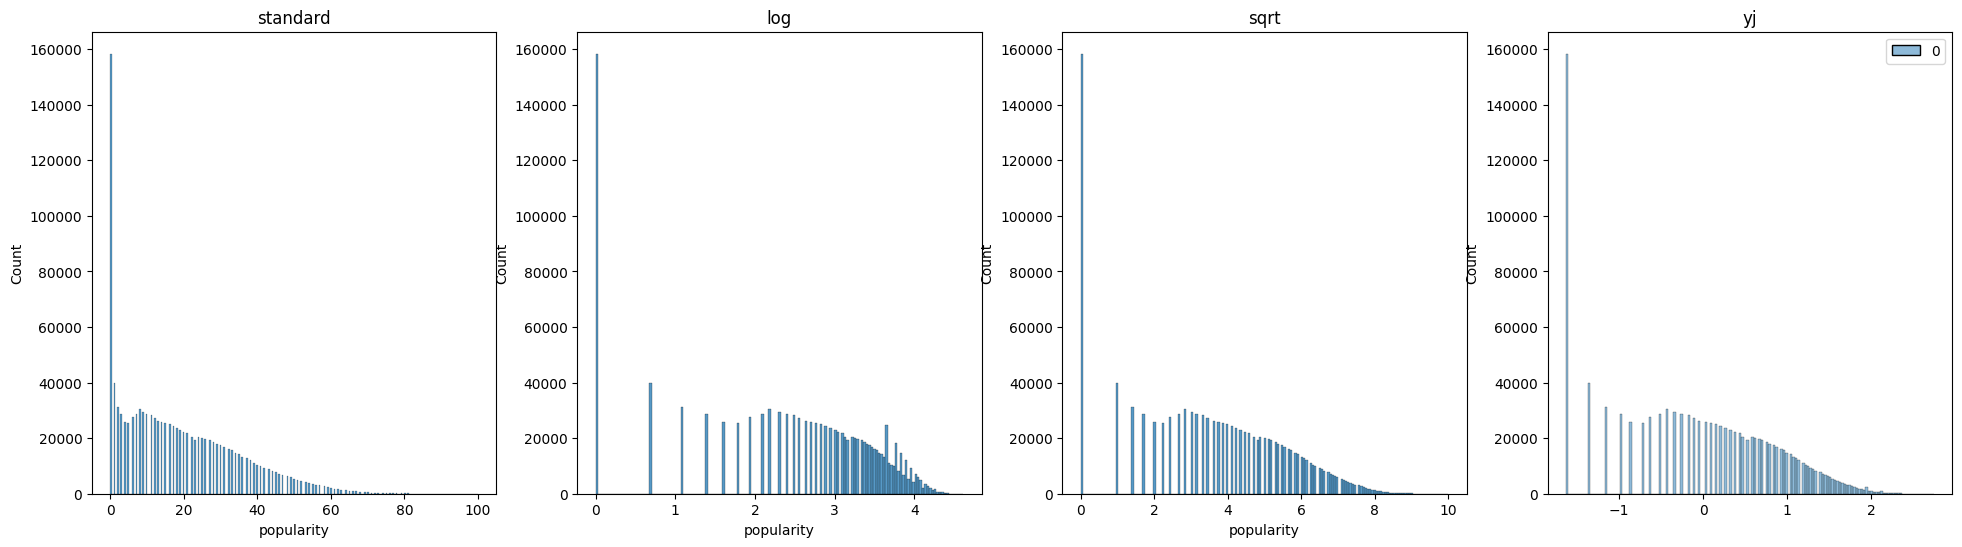

<Axes: xlabel='is_popular', ylabel='Count'>

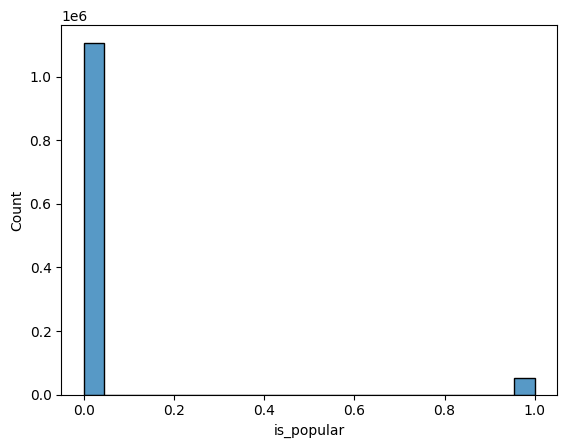

In [16]:
log_popularity = np.log1p(spotify.popularity.copy())
sqrt_popularity = np.sqrt(spotify.popularity.copy())
yj = PowerTransformer(method='yeo-johnson')
yj_popularity = yj.fit_transform(spotify[['popularity']])

fig, axes = plt.subplots(1, 4, figsize=(24, 6))

sns.histplot(spotify.popularity, ax=axes[0])
axes[0].set_title('standard')
sns.histplot(log_popularity, ax=axes[1])
axes[1].set_title('log')
sns.histplot(sqrt_popularity, ax=axes[2])
axes[2].set_title('sqrt')
sns.histplot(yj_popularity, ax=axes[3])
axes[3].set_title('yj')

plt.show()

sns.histplot(spotify.is_popular)

# Correlation

Index(['popularity', 'year', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')


<Axes: >

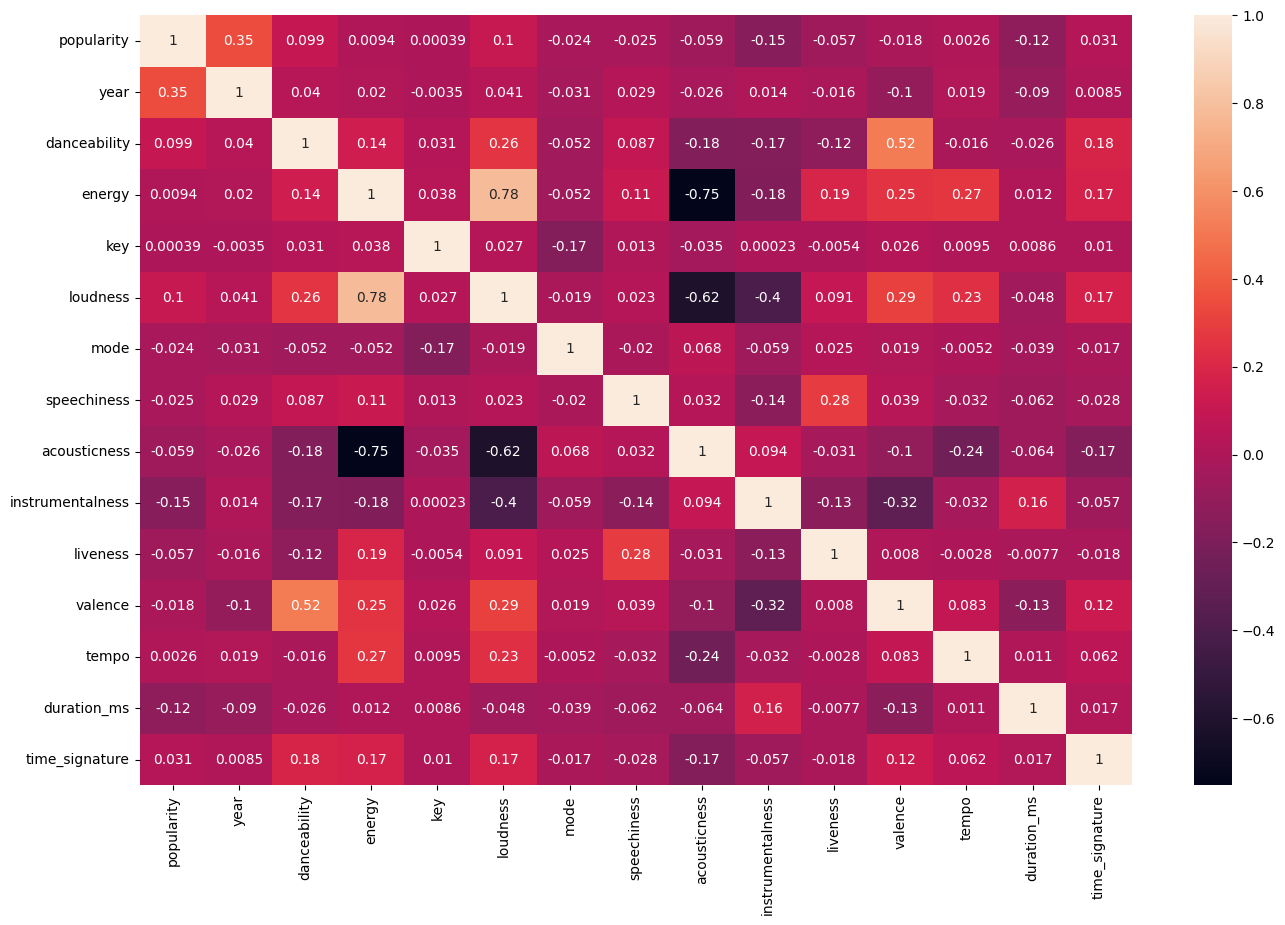

In [4]:
correlation = spotify.copy()

correlation.drop(['Unnamed: 0'], axis=1, inplace=True)

correlation = correlation.select_dtypes(include=['number'])
print(correlation.columns)

plt.figure(figsize=(16, 10))
sns.heatmap(correlation.corr(), annot=True, annot_kws={"size": 10})

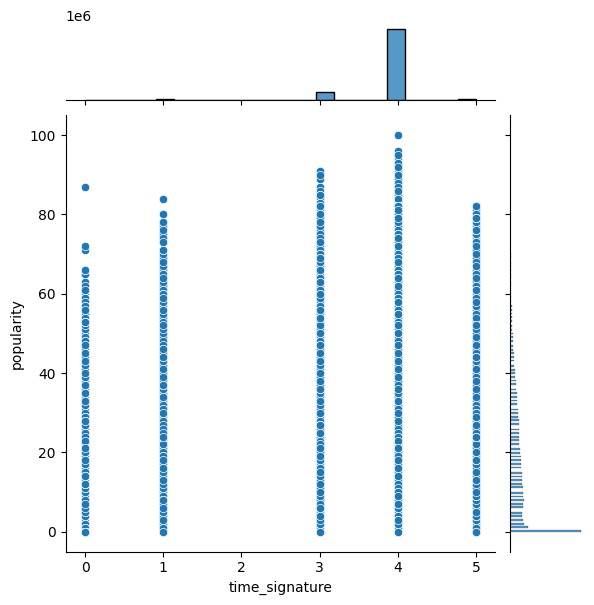

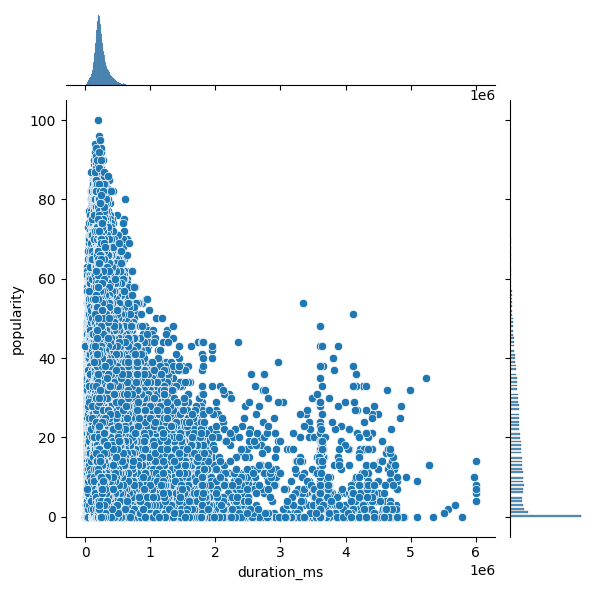

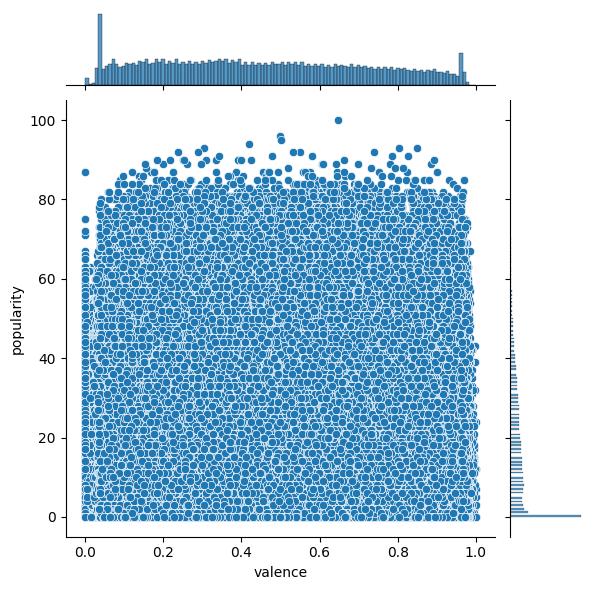

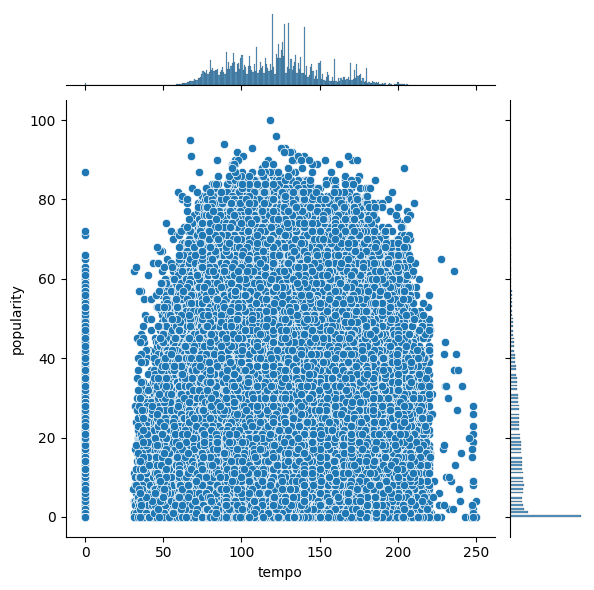

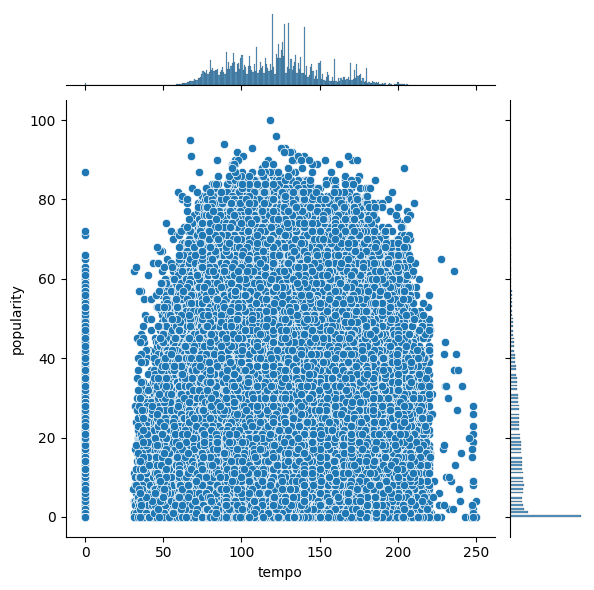

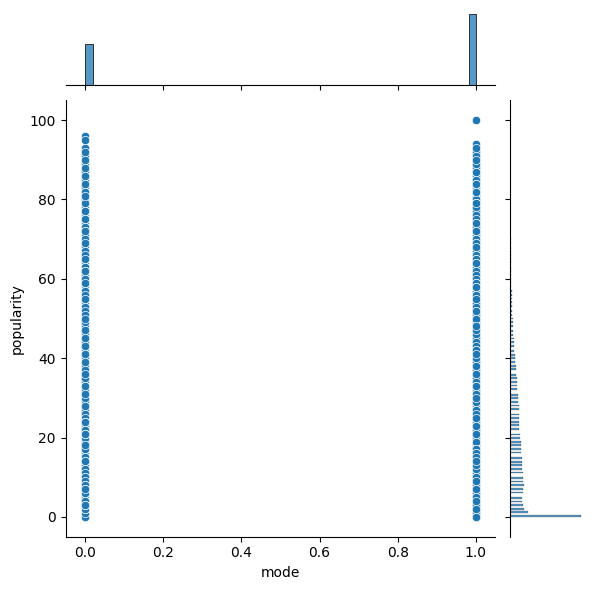

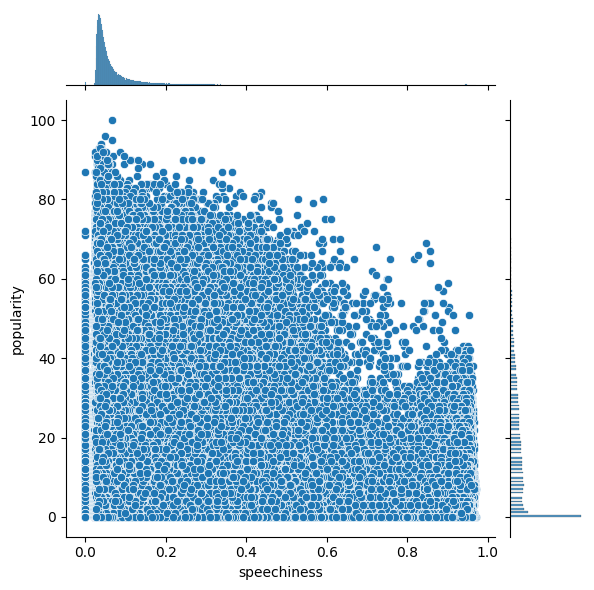

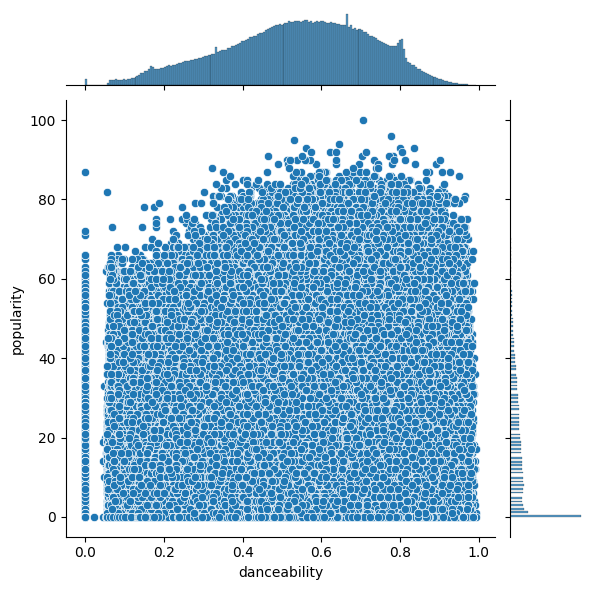

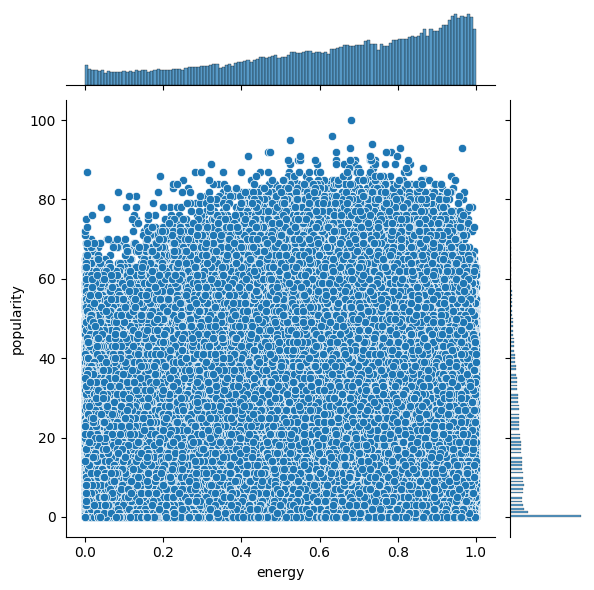

In [6]:
# sns.pairplot(x=spotify.danceability, y=spotify.popularity)


# fig, axes = plt.subplots(2, 3, figsize=(24, 20))

# sns.histplot(spotify.popularity, ax=axes[0])


sns.jointplot(data=spotify, x='time_signature', y='popularity')
sns.jointplot(data=spotify, x='duration_ms', y='popularity')
sns.jointplot(data=spotify, x='valence', y='popularity')
sns.jointplot(data=spotify, x='tempo', y='popularity')
sns.jointplot(data=spotify, x='tempo', y='popularity')
sns.jointplot(data=spotify, x='mode', y='popularity')
sns.jointplot(data=spotify, x='speechiness', y='popularity')
sns.jointplot(data=spotify, x='danceability', y='popularity')
sns.jointplot(data=spotify, x='energy', y='popularity')


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120')])

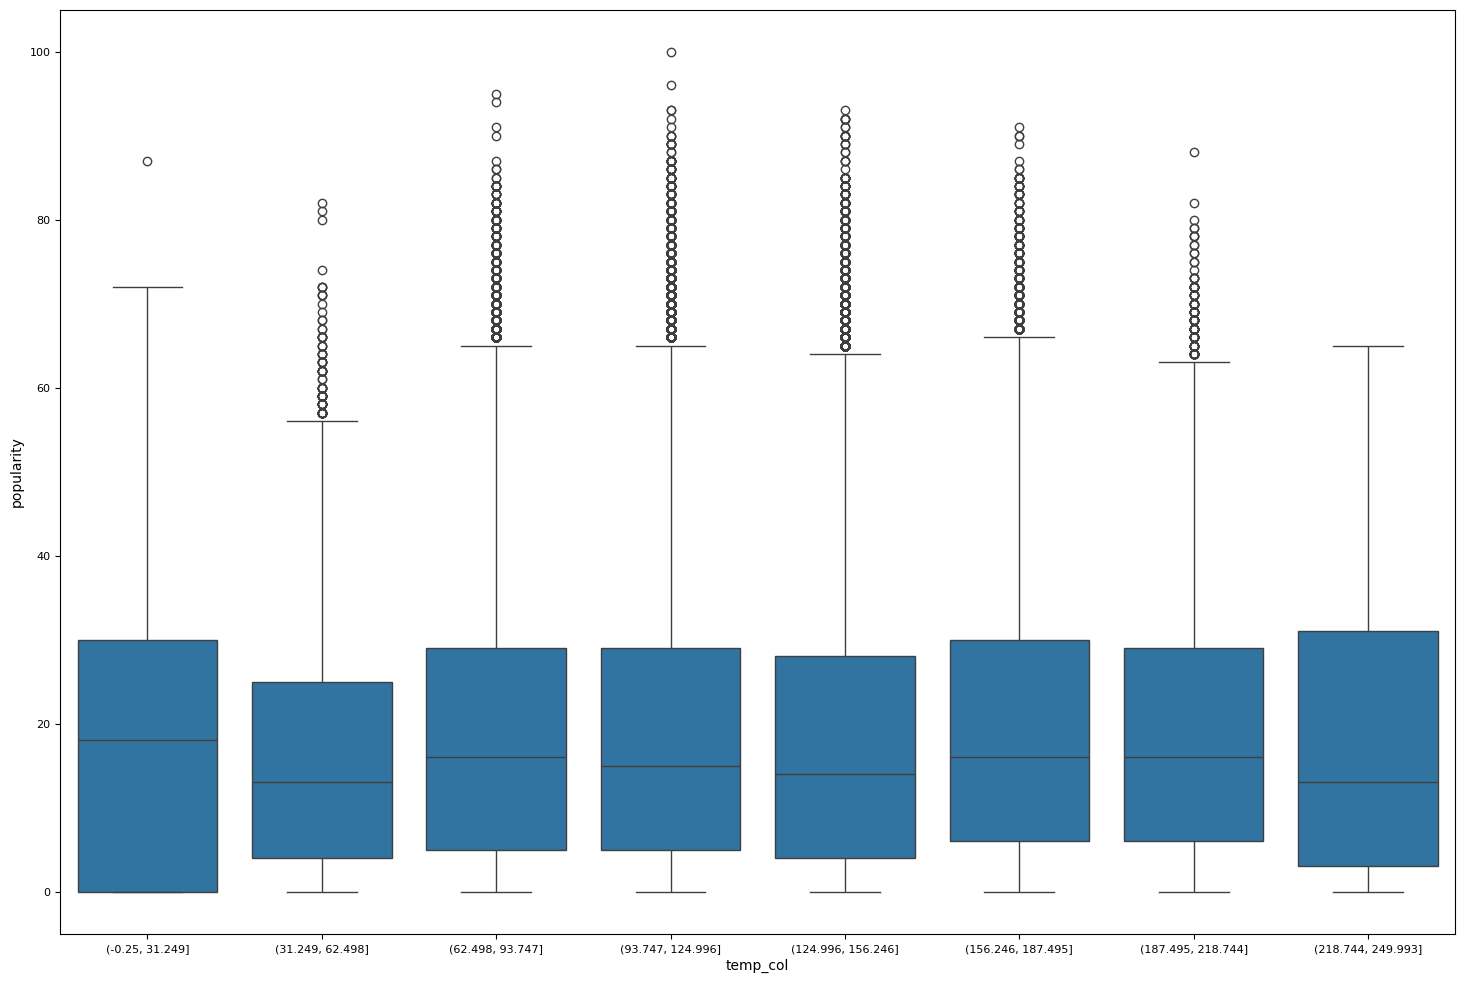

In [11]:
spotify['temp_col'] = pd.cut(spotify['tempo'], bins=8)

plt.figure(figsize=(18,12))
sns.boxplot(data=spotify, x='temp_col', y='popularity')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
# sns.boxplot(data=spotify, x='duration_ms', y='popularity')
# sns.boxplot(data=spotify, x='valence', y='popularity')
# sns.boxplot(data=spotify, x='time_signature', y='popularity')
# sns.boxplot(data=spotify, x='mode', y='popularity')
# sns.boxplot(data=spotify, x='speechiness', y='popularity')
# sns.boxplot(data=spotify, x='danceability', y='popularity')
# sns.boxplot(data=spotify, x='energy', y='popularity')

## Year

<Axes: xlabel='year', ylabel='popularity'>

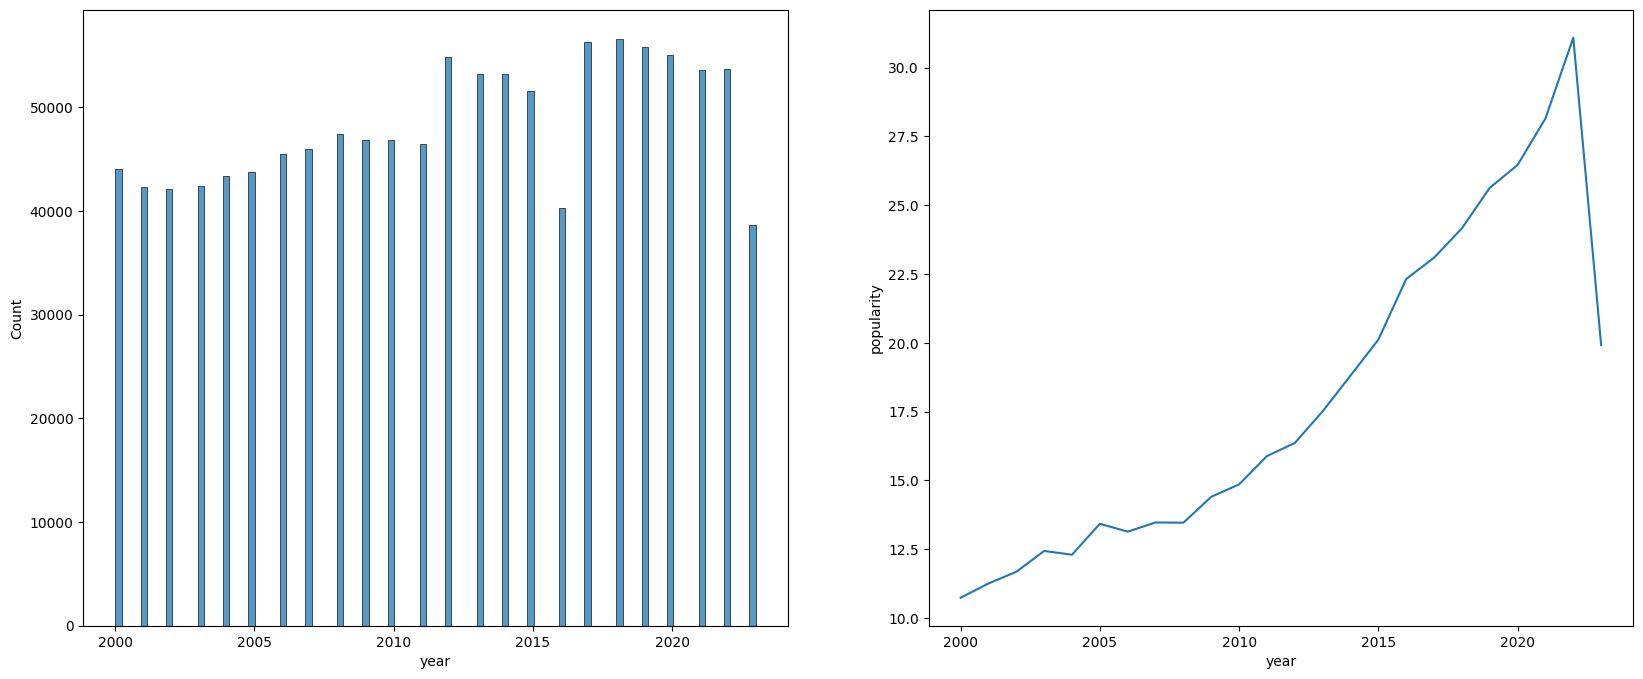

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.histplot(spotify.year, ax=axes[0])

yearly_avg = spotify.groupby('year')['popularity'].mean().reset_index()

sns.lineplot(data=yearly_avg, x='year', y='popularity', ax=axes[1])



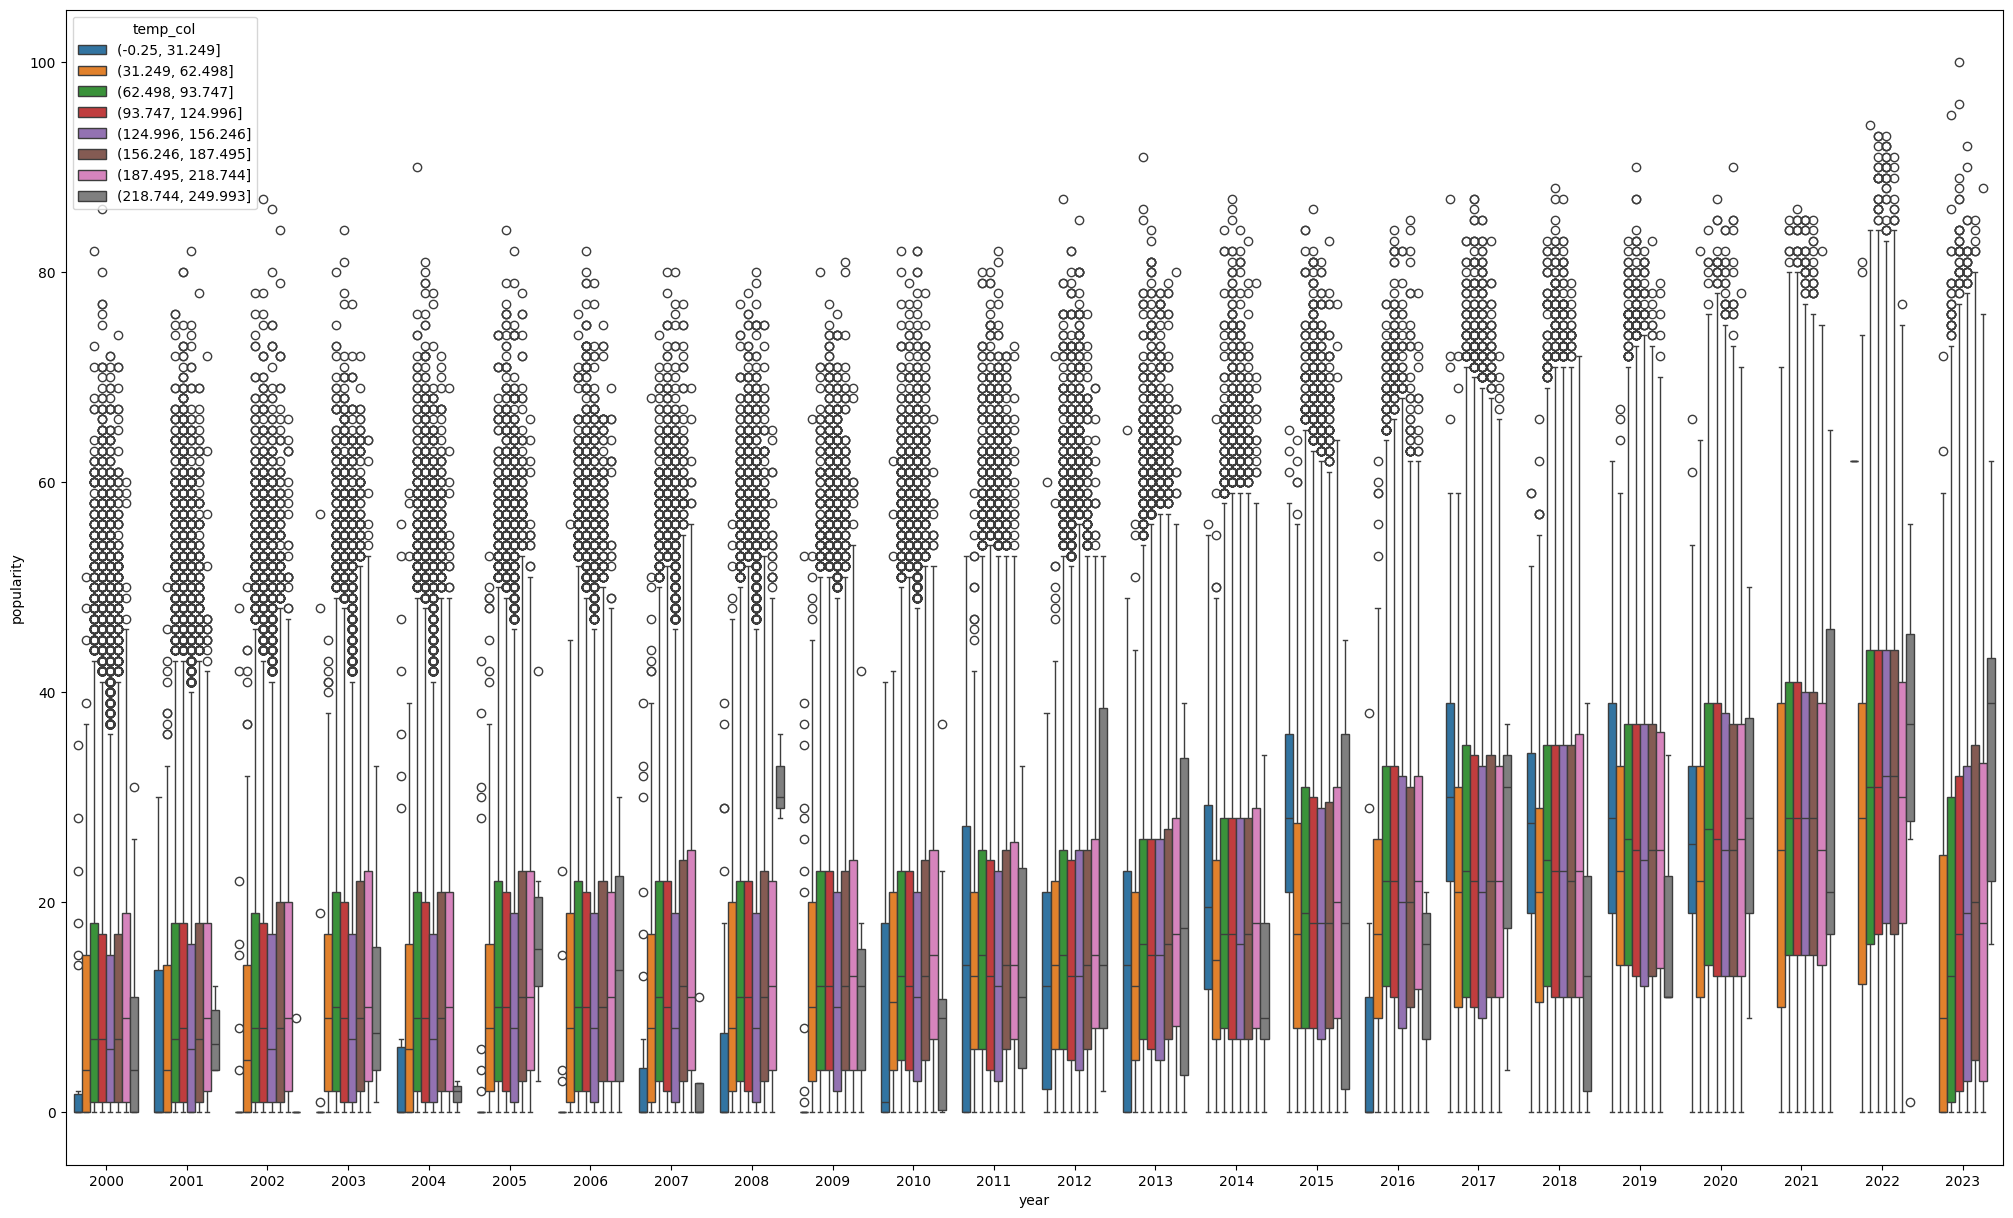

<Axes: xlabel='temp_col', ylabel='popularity'>

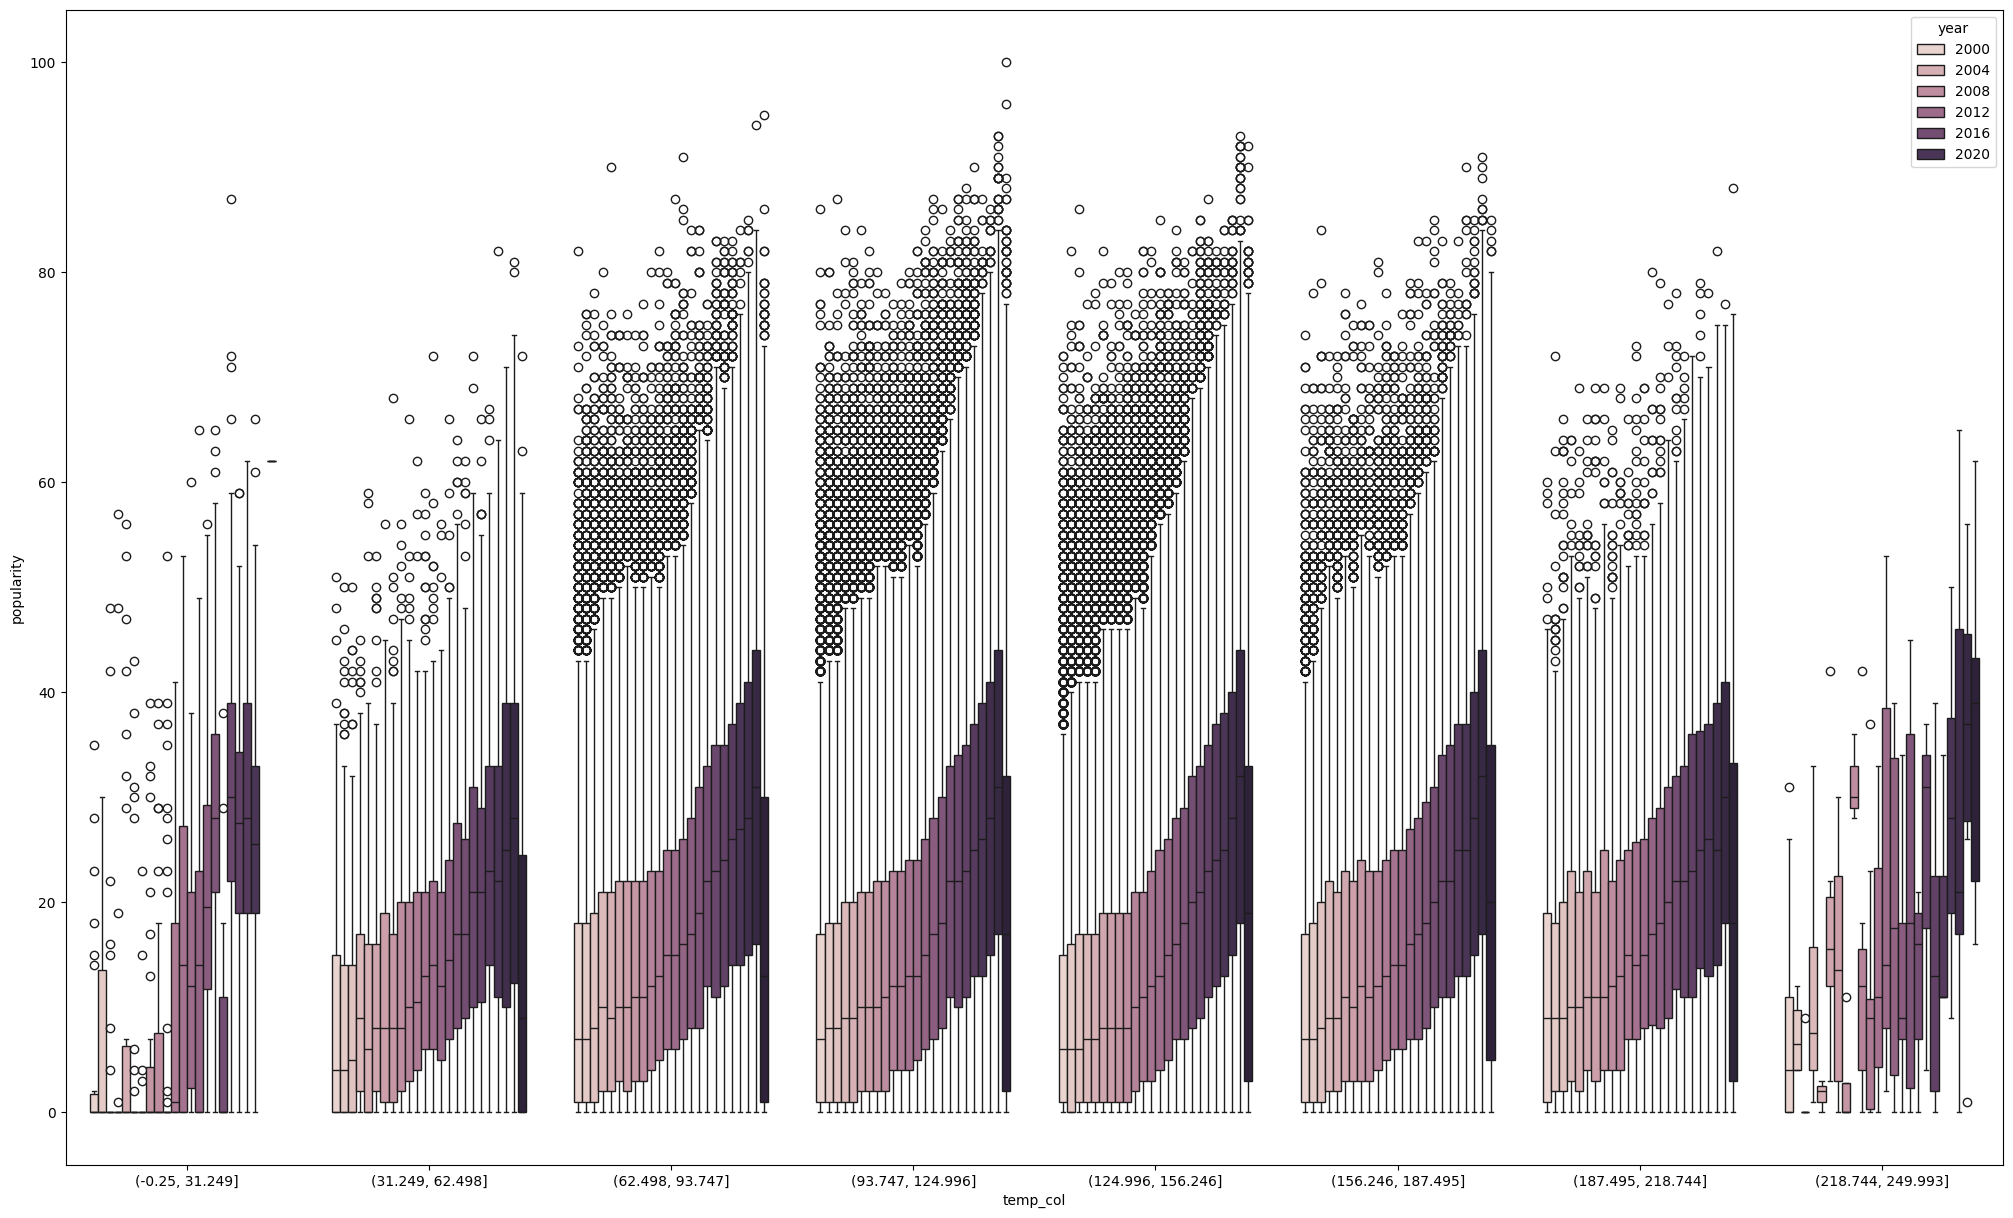

In [12]:
# yj = PowerTransformer(method='yeo-johnson')

# spotify['yj_popularity'] = yj.fit_transform(spotify[['popularity']])

# fig, axes = plt.subplots(1, 2, figsize=(20, 12))

# plt.figure(figsize=(20, 16))
# sns.boxplot(data=spotify, x='year', y='popularity')

# plt.show()

plt.figure(figsize=(25, 15))
sns.boxplot(data=spotify, x='year', y='popularity', hue='temp_col')

plt.show()

plt.figure(figsize=(25, 15))
sns.boxplot(data=spotify, x='temp_col', y='popularity', hue='year')

# plt.show()
# sns.boxplot(x=spotify.year, y=spotify.popularity, hue='year')

# plt.show()
# sns.boxplot(x=spotify.year, y=spotify.popularity, hue='year')

# plt.show()
# sns.boxplot(x=spotify.year, y=spotify.popularity, hue='year')

# sns.boxplot(x=spotify.year, y=spotify.popularity, ax=axes[0])
# axes[0].set_title('standard')
# sns.boxplot(x=spotify.year, y=spotify.yj_popularity, ax=axes[1])
# axes[1].set_title('yeo-johnson')


# Pairplot

In [ ]:
sns.pairplot(data=correlation)

KeyboardInterrupt: 


# ============================ NOTES ============================

drop the last year?